# Data Anaylsis

In [1]:
#Lib
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

dir ='/kaggle/input/have-you-ever-eaten-these-foods/responses.csv'
df = pd.read_csv(dir)

print('\n------------Cloumn Names--------------')
print(df.columns)
print('\n--------------------------')
print('No. Of rows: {}'.format(df.shape[0]))

#
binary_responses = []
multiclass_responses = []
for col in df.columns:
    if df[col].nunique() <=2:
        binary_responses.append(col)
    else:
        multiclass_responses.append(col)
#     print('columns: {}, Type: {}'.format(col,df[col].dtype))
        
print('\n----------Binary Response Values---------')
print(binary_responses)
print('\n----------Multiclass Response Values---------')
print(multiclass_responses)

m = {'True':True,'False':False}
for col in binary_responses:
    df[col].fillna(False,inplace=True)
    if df[col].dtype in ['bool']:
        pass
    else:
        df[col].astype('bool')
        df[col].map(m)


------------Cloumn Names--------------
Index(['Age in years', 'Gender', 'Race', 'Home location', 'Cockroach', 'Sushi',
       'Rocky Mountain oyster', 'Spam', 'Cow urine', 'Jalapeño',
       'Alligator meat', 'Paper', 'Hawaiian pizza', 'Pig's trotters', 'Durian',
       'Monkey brains', 'Frog legs', 'Caviar', 'Fugu', 'Balut', 'Lutefisk',
       'Century egg', 'Salo', 'Locusts'],
      dtype='object')

--------------------------
No. Of rows: 547

----------Binary Response Values---------
['Cockroach', 'Sushi', 'Rocky Mountain oyster', 'Spam', 'Cow urine', 'Jalapeño', 'Alligator meat', 'Paper', 'Hawaiian pizza', "Pig's trotters", 'Durian', 'Monkey brains', 'Frog legs', 'Caviar', 'Fugu', 'Balut', 'Lutefisk', 'Century egg', 'Salo', 'Locusts']

----------Multiclass Response Values---------
['Age in years', 'Gender', 'Race', 'Home location']


# Analyse the responses for each Dish

### In total how many people try each dish ?

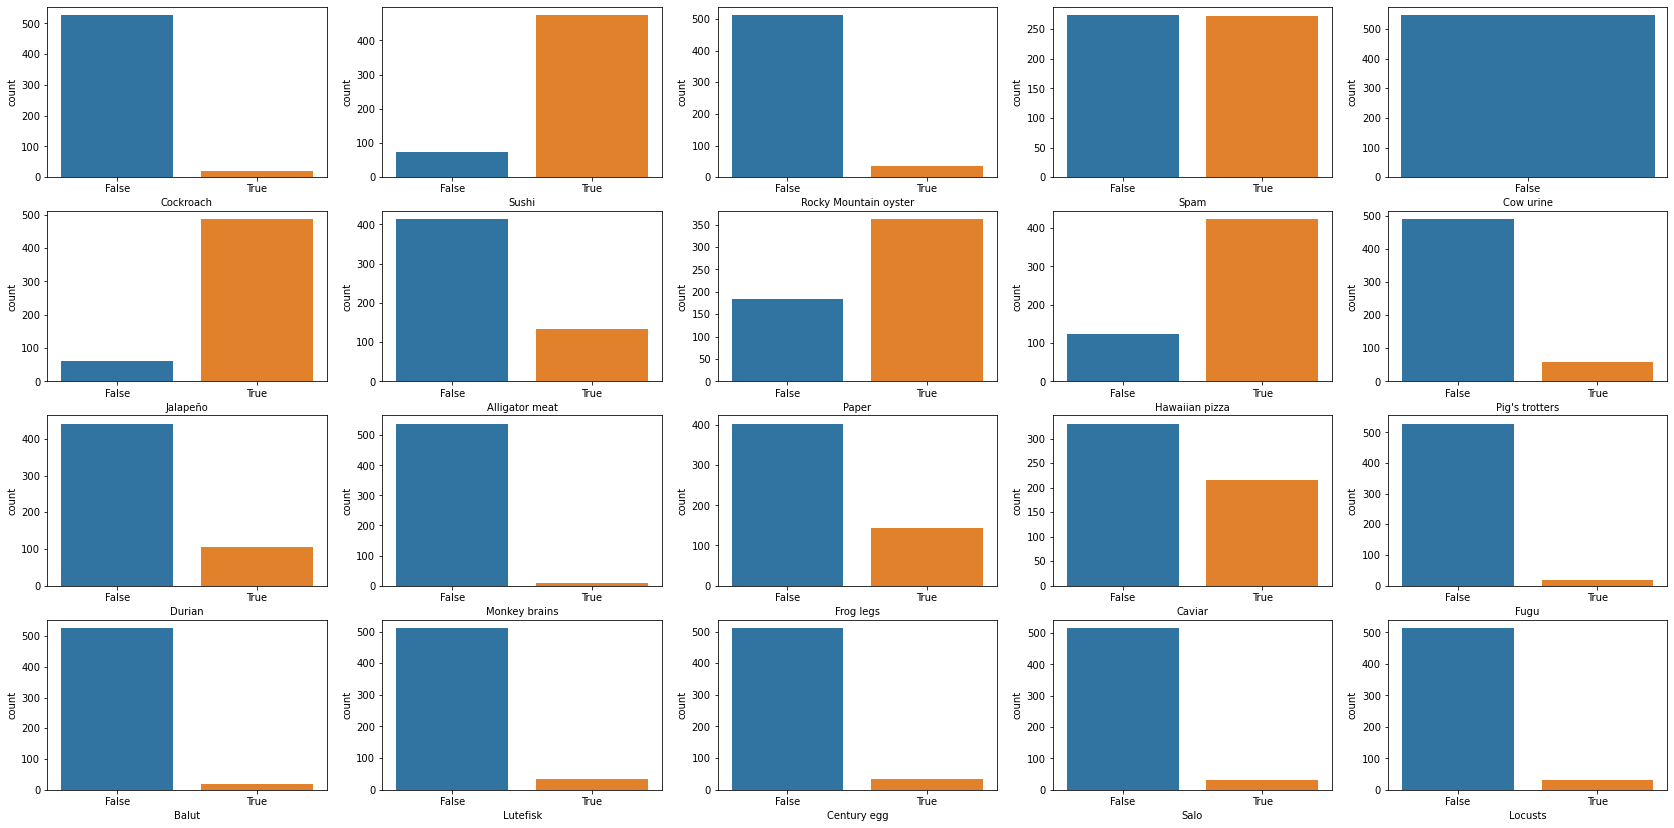

In [2]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 30))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)

for i, feature in enumerate(list(df[binary_responses]), 1):
    plt.subplot(len(list(binary_responses)), 5, i)
    sns.countplot(x=feature, data=df)
plt.show()

## Response Count by Gender,Race Home Location


In [3]:
# for col in multiclass_responses:
#     print('---------------------------')
#     print(col)
#     print(df[col].unique())
#     print(df[col].nunique())
#     print('\n')

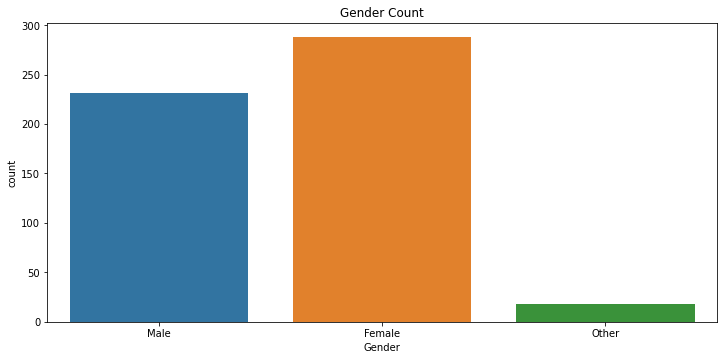

In [4]:
plt.figure(figsize=(12,5.5));
plt.title("Gender Count");
sns.countplot(x="Gender", data=df);

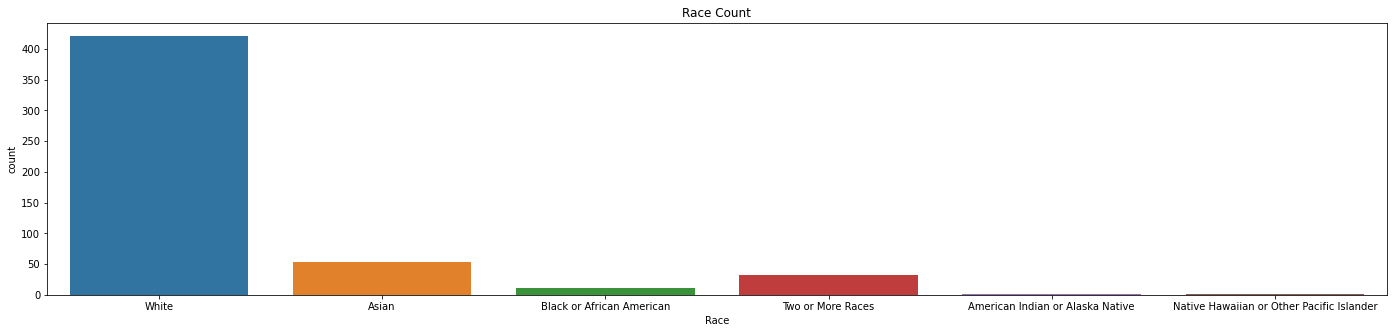

In [5]:
plt.figure(figsize=(24,5))
sns.set_color_codes(palette='deep')
ax = sns.countplot(x="Race", data=df)
plt.title("Race Count");

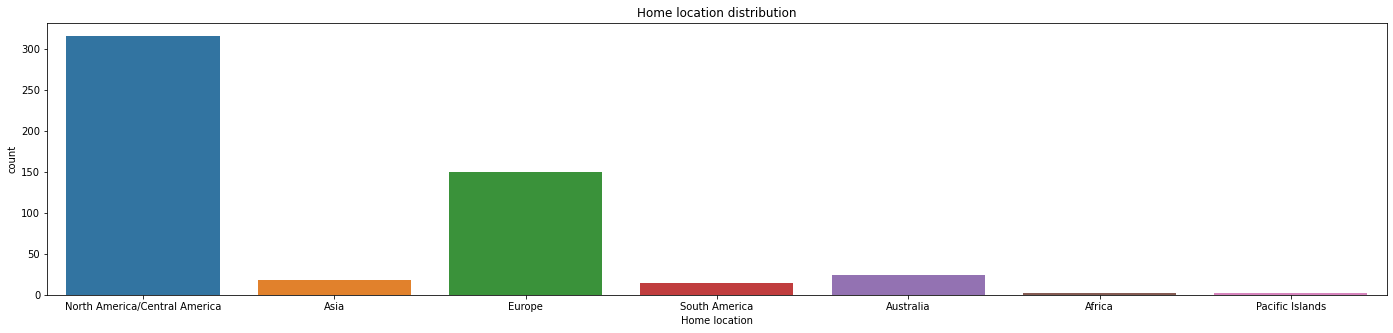

In [6]:
plt.figure(figsize=(24,5))

sns.countplot(x="Home location", data=df)
plt.title("Home location distribution");

# Younger or Elder which food you have tried

In [7]:
# Top puopular food count 
dish=[]
fav=[]
fav_male=[]
fav_female=[]
fav_other=[]

i=0
ind=[]

df.fillna('Female',inplace=True)

for col in binary_responses:
    
    condi=df[col].loc[df[col]==True].count()
    male_condi=df[col].loc[(df[col]==True) & (df.Gender=='Male')].count()
    female_condi=df[col].loc[(df[col]==True) & (df.Gender=='Female')].count()
    other_condi=df[col].loc[(df[col]==True) & (df.Gender=='Other')].count()
    
    dish.append(col)
    
    fav.append(condi)
    fav_male.append(male_condi)
    fav_female.append(female_condi)
    fav_other.append(other_condi)

    ind.append(i)
    i=i+1 
    
food = pd.DataFrame({"Dish":dish,"Count":fav,"Male_Count":fav_male,"Female_Count":fav_female,"Other_Count":fav_other},index=ind) 
food=food.sort_values(by=['Count'],ascending=True)
px.bar(data_frame=food, x=food.Dish, y=['Count'], color=None, hover_name=food.Dish,title="Dish tired atleast-onces among all ages people ")


In [8]:
px.bar(data_frame=food, x=food.Dish, y=[food.Male_Count,food.Female_Count,food.Other_Count], 
       color=None, hover_name=food.Dish,title="Dish tired atleast-onces among all ages people by Gender ")

# Which age group tried what dish atleast onces among responded ?

#### Age between 15-30 has responded the most

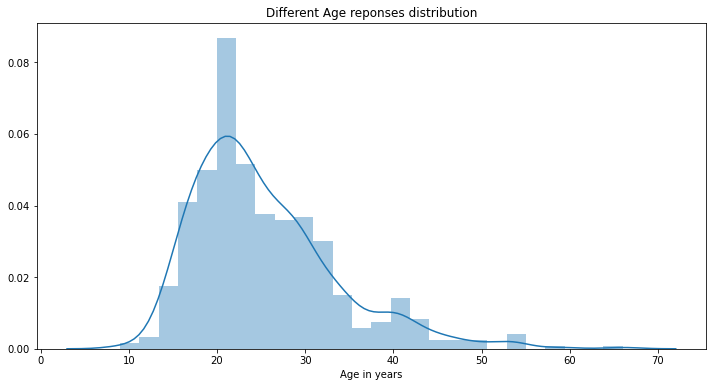

In [9]:
plt.figure(figsize=(12,6));
plt.title("Different Age reponses distribution");
sns.distplot(a=df['Age in years'], kde=True,norm_hist=False);

In [10]:
# Top puopular food count 
bins = [x for x in range(5,65,11)]
labels = ['5-15','15-25','25-35','35-45','45-']
df['Age Range']= pd.cut(df['Age in years'], bins=bins, labels=labels, right=True)

dish=[]
labels_1=[]
labels_2=[]
labels_3=[]
labels_4=[]
labels_5=[]

i=0
ind=[]

# df.fillna('Female',inplace=True)

for col in binary_responses:
    labels_1_condi=df[col].loc[(df[col]==True) & (df['Age Range']=='5-15')].count()
    labels_2_condi=df[col].loc[(df[col]==True) & (df['Age Range']=='15-25')].count()
    labels_3_condi=df[col].loc[(df[col]==True) & (df['Age Range']=='25-35')].count()
    labels_4_condi=df[col].loc[(df[col]==True) & (df['Age Range']=='35-45')].count()
    labels_5_condi=df[col].loc[(df[col]==True) & (df['Age Range']=='45-')].count()

    dish.append(col)
    labels_1.append(labels_1_condi)
    labels_2.append(labels_2_condi)
    labels_3.append(labels_3_condi)
    labels_4.append(labels_4_condi)
    labels_5.append(labels_5_condi)

    ind.append(i)
    i=i+1 
    
Age_food = pd.DataFrame({"Dish":dish,
                     "5-15":labels_1,"15-25":labels_2,"25-35":labels_3,
                     "35-45":labels_4,'45-above':labels_5},index=ind) 

In [11]:
Age_food=Age_food.sort_values(by=['5-15'],ascending=False)
px.bar(data_frame=Age_food, x=Age_food.Dish, y=Age_food['5-15'],hover_name=Age_food.Dish,title="Dish tired atleast-onces among Age 5-15 ")

In [12]:
Age_food=Age_food.sort_values(by=['15-25'],ascending=False)
px.bar(data_frame=Age_food, x=Age_food.Dish, y=Age_food['15-25'],hover_name=Age_food.Dish,title="Dish tired atleast-onces among Age 15-25	")

In [13]:
Age_food=Age_food.sort_values(by=['25-35'],ascending=False)
px.bar(data_frame=Age_food, x=Age_food.Dish, y=Age_food['25-35'],hover_name=Age_food.Dish,title="Dish tired atleast-onces among Age 25-35	 ")

In [14]:
Age_food=Age_food.sort_values(by=['45-above'],ascending=False)
px.bar(data_frame=Age_food, x=Age_food.Dish, y=Age_food['45-above'],hover_name=Age_food.Dish,title="Dish tired atleast-onces among Age 45-above")